In [1]:
#source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
import numpy
import matplotlib.pyplot as plt
import pandas
import pandas as pd 
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
numpy.random.seed(7)

# load the dataset
dataframe = pd.read_csv(r'/content/drive/MyDrive/finaldatasets/ny_daily.csv', usecols=[2], engine='python')
dataset = dataframe.values
dataset = dataset[300:380]

In [3]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [4]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

64 16


In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [8]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(16, input_shape=(1, look_back)))
model.add(Dense(1))


In [9]:
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
62/62 - 2s - loss: 0.1635 - 2s/epoch - 28ms/step
Epoch 2/100
62/62 - 0s - loss: 0.0763 - 109ms/epoch - 2ms/step
Epoch 3/100
62/62 - 0s - loss: 0.0414 - 113ms/epoch - 2ms/step
Epoch 4/100
62/62 - 0s - loss: 0.0345 - 135ms/epoch - 2ms/step
Epoch 5/100
62/62 - 0s - loss: 0.0329 - 112ms/epoch - 2ms/step
Epoch 6/100
62/62 - 0s - loss: 0.0314 - 130ms/epoch - 2ms/step
Epoch 7/100
62/62 - 0s - loss: 0.0301 - 118ms/epoch - 2ms/step
Epoch 8/100
62/62 - 0s - loss: 0.0290 - 115ms/epoch - 2ms/step
Epoch 9/100
62/62 - 0s - loss: 0.0279 - 113ms/epoch - 2ms/step
Epoch 10/100
62/62 - 0s - loss: 0.0268 - 113ms/epoch - 2ms/step
Epoch 11/100
62/62 - 0s - loss: 0.0256 - 122ms/epoch - 2ms/step
Epoch 12/100
62/62 - 0s - loss: 0.0250 - 128ms/epoch - 2ms/step
Epoch 13/100
62/62 - 0s - loss: 0.0242 - 111ms/epoch - 2ms/step
Epoch 14/100
62/62 - 0s - loss: 0.0237 - 107ms/epoch - 2ms/step
Epoch 15/100
62/62 - 0s - loss: 0.0236 - 116ms/epoch - 2ms/step
Epoch 16/100
62/62 - 0s - loss: 0.0229 - 114ms/epoc

In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [11]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 881.73 RMSE
Test Score: 898.47 RMSE


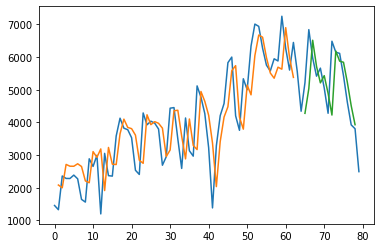

In [12]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [24]:
iimport numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:
df = pd.read_csv(r'/content/drive/MyDrive/finaldatasets/ny_daily.csv')

In [23]:
df.describe()

,Unnamed: 0,case
count,688.000000,688.000000
mean,343.500000,1717.350291
std,198.752778,1956.608128
min,0.000000,0.000000
25%,171.750000,313.750000
50%,343.500000,971.500000
75%,515.250000,2817.750000
max,687.000000,24169.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  688 non-null    int64 
 1   time        688 non-null    object
 2   case        688 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.2+ KB


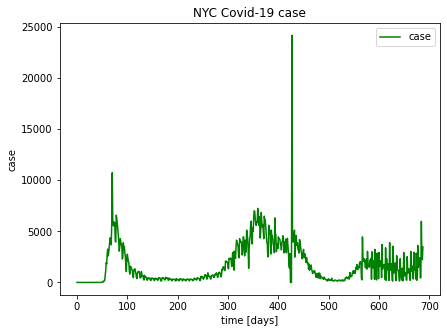

In [29]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
#plt.plot(df.time.values, color='red', label='open')
plt.plot(df.case.values, color='green', label='case')

plt.title('NYC Covid-19 case')
plt.xlabel('time [days]')
plt.ylabel('case')
plt.legend(loc='best')

In [35]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['case'] = min_max_scaler.fit_transform(df.case.values.reshape(-1,1))
    #df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    #df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    #df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(case, seq_len):
    data_raw = case#.values() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]#[x_train, x_valid, x_test]

# choose one stock
df_stock = df.copy()
#df_stock.drop(['symbol'],1,inplace=True)
#df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
#x_train, x_valid, x_test= load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['Unnamed: 0', 'time', 'case']
x_train.shape =  (534, 19, 3)
y_train.shape =  (534, 3)
x_valid.shape =  (67, 19, 3)
y_valid.shape =  (67, 3)
x_test.shape =  (67, 19, 3)
y_test.shape =  (67, 3)
